<a href="https://colab.research.google.com/github/Goodone11/spam-detection/blob/main/Spam_detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("venky73/spam-mails-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.86M/1.86M [00:00<00:00, 3.22MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/venky73/spam-mails-dataset/versions/1


In [2]:

import os
print(os.listdir(path))

['spam_ham_dataset.csv']


In [3]:
import pandas as pd

# Read CSV file
file_path = os.path.join(path, "spam_ham_dataset.csv")
df = pd.read_csv(file_path)

print("Data preview:")
print(df.head())

Data preview:
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [4]:
#df.shape
print("Successfully loaded {} rows and {} columns!".format(df.shape[0], df.shape[1]))

Successfully loaded 5171 rows and 4 columns!


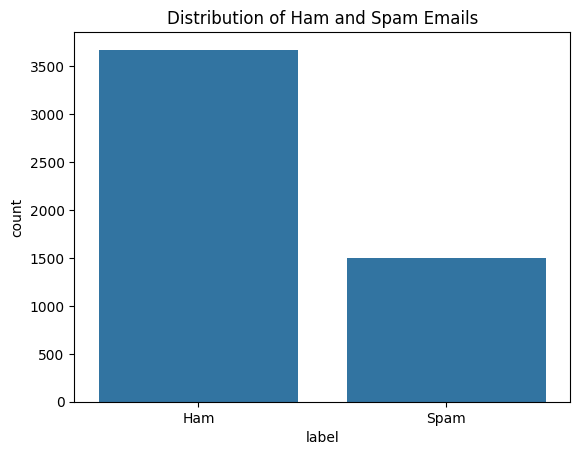

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution
sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title("Distribution of Ham and Spam Emails")
plt.show()

In [6]:
label_frequency = df['label'].value_counts().reset_index()

# Rename columns for clarity
label_frequency.columns = ['label', 'frequency']

print(label_frequency)

  label  frequency
0   ham       3672
1  spam       1499


In [7]:
# Calculate percentage of each unique value in 'label' column
label_percentage = df['label'].value_counts(normalize=True).reset_index()

# Rename columns for clarity
label_percentage.columns = ['label', 'percentage']

# Format percentage with percent sign
label_percentage['percentage'] = (label_percentage['percentage'] * 100).round(2).astype(str) + '%'

print(label_percentage)

  label percentage
0   ham     71.01%
1  spam     28.99%


In [8]:
label_percentage = df['label'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
label_percentage = label_percentage.reset_index().rename(columns={'index': 'label', 'label': 'percentage'})

print(label_percentage)


  percentage proportion
0        ham     71.01%
1       spam     28.99%


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [10]:
from imblearn.over_sampling import RandomOverSampler

# Separate features and target variable
X = df['text']
y = df['label']

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X.values.reshape(-1, 1), y)

In [11]:
# Convert y_resampled to a DataFrame for easier manipulation
y_resampled_df = pd.DataFrame(y_resampled, columns=['label'])

# Calculate frequency and percentage for each label
frequency = y_resampled_df['label'].value_counts()
percentage = y_resampled_df['label'].value_counts(normalize=True) * 100

# Display frequency and percentage
print("Frequency of each label after resampling:")
print(frequency)
print("\nPercentage of each label after resampling:")
print(percentage)

Frequency of each label after resampling:
label
ham     3672
spam    3672
Name: count, dtype: int64

Percentage of each label after resampling:
label
ham     50.0
spam    50.0
Name: proportion, dtype: float64


In [12]:
len(X_resampled)

7344

In [13]:
# Split the data into features and target variable
X = df['text']
y = df['label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data, and transform the test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [15]:
# Initialize and fit the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_tfidf, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))


Logistic Regression:
Accuracy: 0.9835748792270531
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       742
        spam       0.97      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



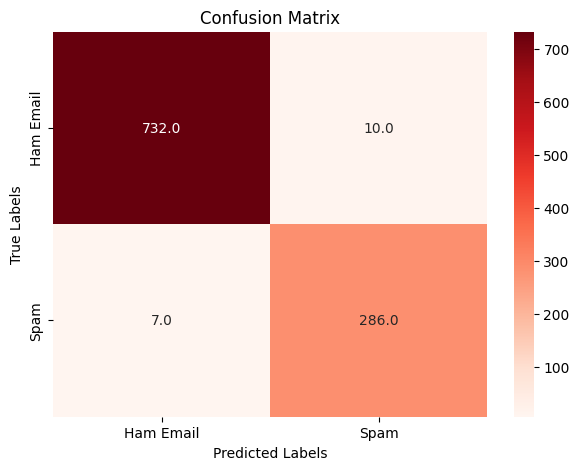

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, logistic_predictions)

labels = ['Ham Email', 'Spam']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(conf_matrix,annot=True, fmt='.1f', cmap="Reds" , ax=ax);

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Initialize and fit the SVC model
svc_model = SVC()
svc_model.fit(X_train_tfidf, y_train)

# Make predictions
svc_predictions = svc_model.predict(X_test_tfidf)

# Evaluate the model
print("Support Vector Classifier (SVC):")
print("Accuracy:", accuracy_score(y_test, svc_predictions))
print(classification_report(y_test, svc_predictions))


Support Vector Classifier (SVC):
Accuracy: 0.9855072463768116
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       742
        spam       0.96      0.99      0.97       293

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035



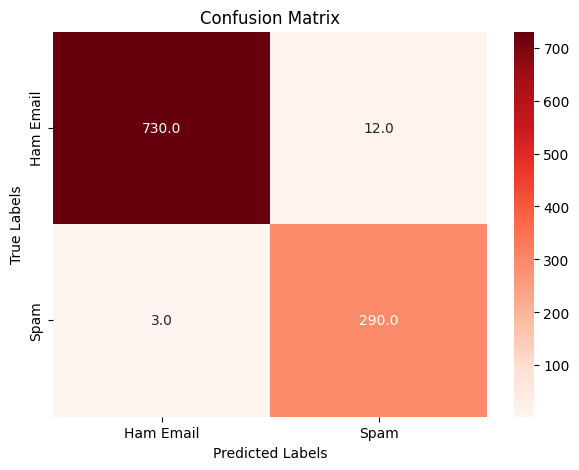

In [33]:


conf_matrix = confusion_matrix(y_test, svc_predictions)
labels = ['Ham Email', 'Spam']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(conf_matrix,annot=True, fmt='.1f', cmap="Reds" , ax=ax);

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_tfidf)

# Evaluate the model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Random Forest Classifier:
Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       742
        spam       0.97      0.95      0.96       293

    accuracy                           0.98      1035
   macro avg       0.98      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



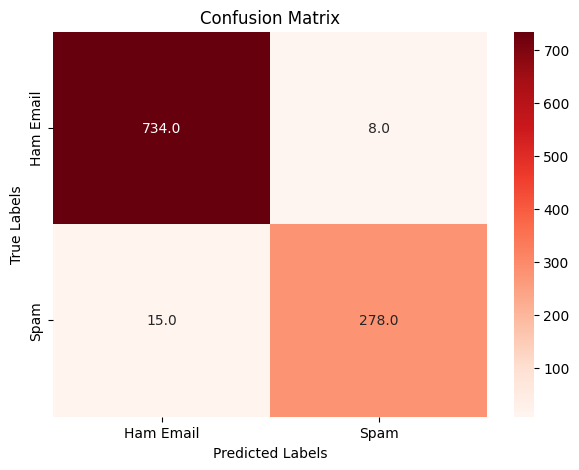

In [34]:
conf_matrix = confusion_matrix(y_test, rf_predictions)

labels = ['Ham Email', 'Spam']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(conf_matrix,annot=True, fmt='.1f', cmap="Reds" , ax=ax);

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()